# Data Visualisation

In [30]:
import pandas as pd
from pandas.plotting import andrews_curves
from pandas.plotting import parallel_coordinates
from pandas.plotting import radviz
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
sns.set(style = "white", color_codes = True)
df = pd.read_csv("IRIS.csv")
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


df.tail(5)

## Datatypes 

In [3]:
df.dtypes #determine the different datatypes 

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [5]:
df["species"].value_counts() #count differnt types of species

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [6]:
df.shape #count number of rows

(150, 5)

## Duplicated rows 


In [11]:
duplicate_rows_df = df[df.duplicated()] #determine number of duplicated rows
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (3, 5)


In [12]:
df = df.drop_duplicates()
df.count()

sepal_length    147
sepal_width     147
petal_length    147
petal_width     147
species         147
dtype: int64

In [13]:
df.shape

(147, 5)

# Dropping missing values


In [14]:
df.dropna() #dropping missing values
df.count()

sepal_length    147
sepal_width     147
petal_length    147
petal_width     147
species         147
dtype: int64

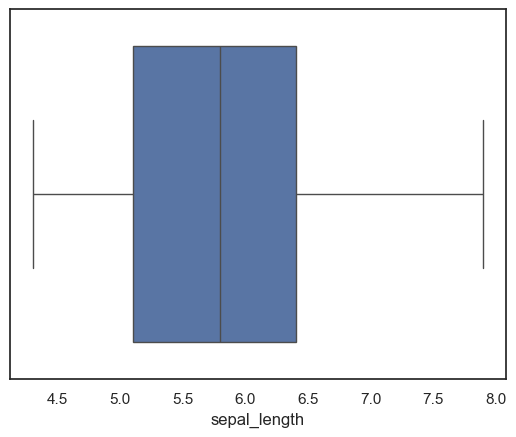

In [15]:
sns.boxplot(x=df['sepal_length'])
plt.show()

In [31]:
df.shape

(143, 5)

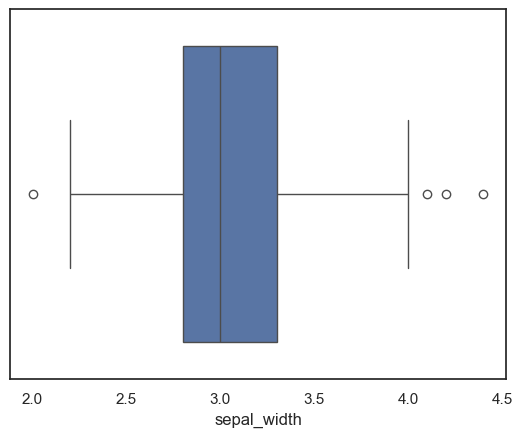

In [18]:
sns.boxplot(x=df['sepal_width'])
plt.show()

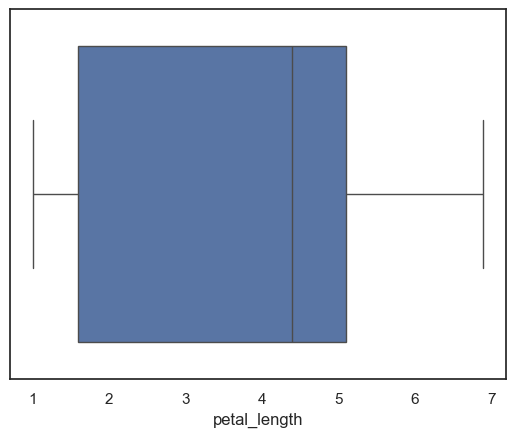

In [19]:
sns.boxplot(x=df['petal_length'])
plt.show()

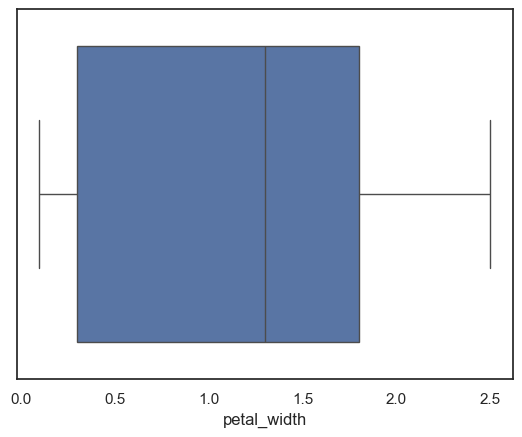

In [20]:
sns.boxplot(x=df['petal_width'])
plt.show()

## Outliers

In [23]:
numeric_df = df.select_dtypes(include='number')

In [26]:
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

In [39]:
mask = (df.lt(Q1 - 1.5 * IQR)) | (df.gt(Q3 + 1.5 * IQR))
df = df[~mask.any(axis=1)] #removing outliers

In [38]:
df.shape #count rows after removing outliers


(143, 5)

Text(0.5, 1.0, 'Sepal Dimensions')

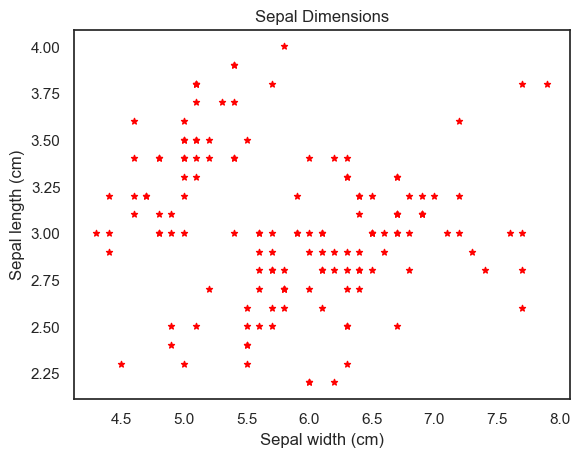

In [57]:
df.plot(kind = "scatter", x = "sepal_length", y = "sepal_width", color = "red", marker = "*") # Create scatter plot

# Add axis labels with units
plt.xlabel("Sepal width (cm)")
plt.ylabel("Sepal length (cm)")

# Optional: Add a title
plt.title("Sepal Dimensions")

In [34]:
df.shape #count rows after removing outliers


(150, 5)

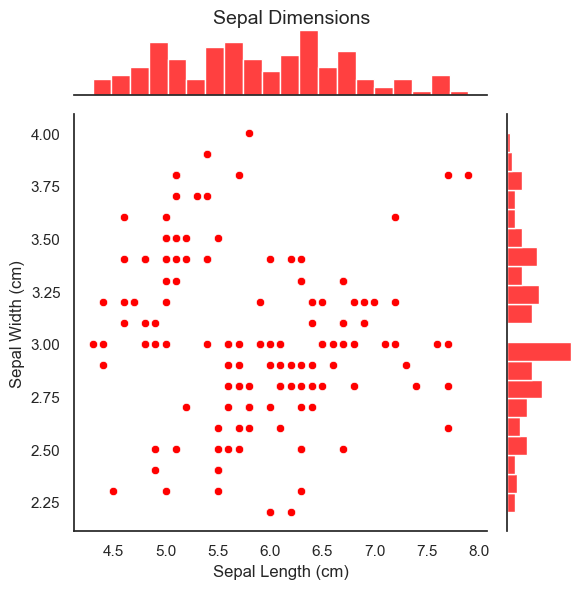

In [63]:
g = sns.jointplot(data=df, x = "sepal_length", y = "sepal_width", marginal_kws=dict(bins=20, fill=True), color = "red") # Create scatter plot

# Add axis labels with units
g.set_axis_labels("Sepal Length (cm)", "Sepal Width (cm)")

# Optional: Add a title
g.fig.suptitle("Sepal Dimensions", fontsize=14)

# Adjust layout to prevent title overlap
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust top to make space for title

Text(0.5, 1.0, 'Box plots showing petal length per species')

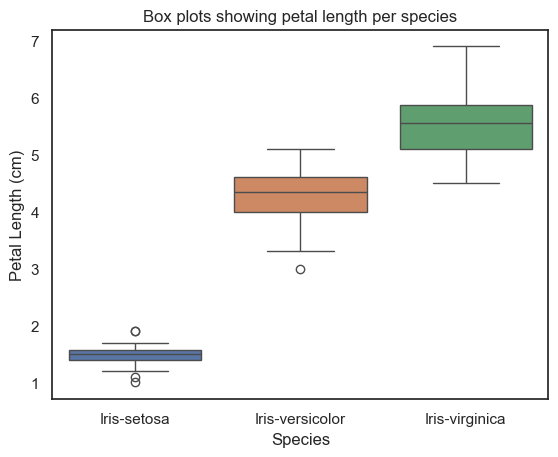

In [15]:
sns.boxplot(x = "species", y = "petal_length", data = df, palette="deep")

plt.xlabel("Species")
plt.ylabel("Petal Length (cm)")

plt.title("Box plots showing petal length per species")

**Clustering with density contours**

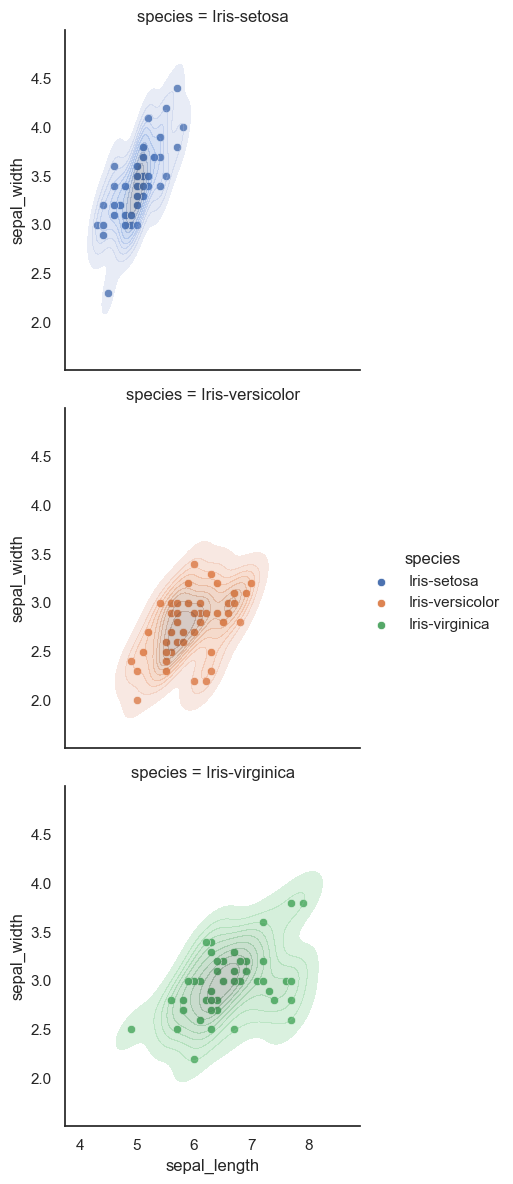

In [12]:
g = sns.FacetGrid(df, row="species", hue="species", height=4, aspect=1)
g.map(sns.scatterplot, "sepal_length", "sepal_width")
g.map(sns.kdeplot, "sepal_length", "sepal_width", fill=True, alpha=0.3) #kdeplot for density contours
g.add_legend()

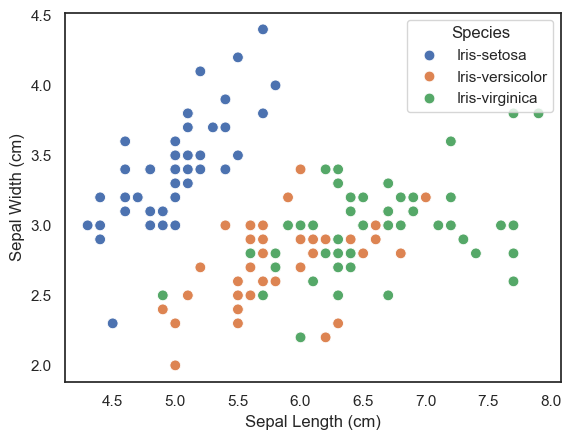

In [14]:
sns.scatterplot(
    data=df,
    x="sepal_length",
    y="sepal_width",
    hue="species",
    palette="deep",  # Optional: sets color style
    s=60             # Optional: size of the points
)

# Label axes (to match your image)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")

# Display legend and plot
plt.legend(title="Species")
plt.show()

<Axes: xlabel='species', ylabel='sepal_length'>

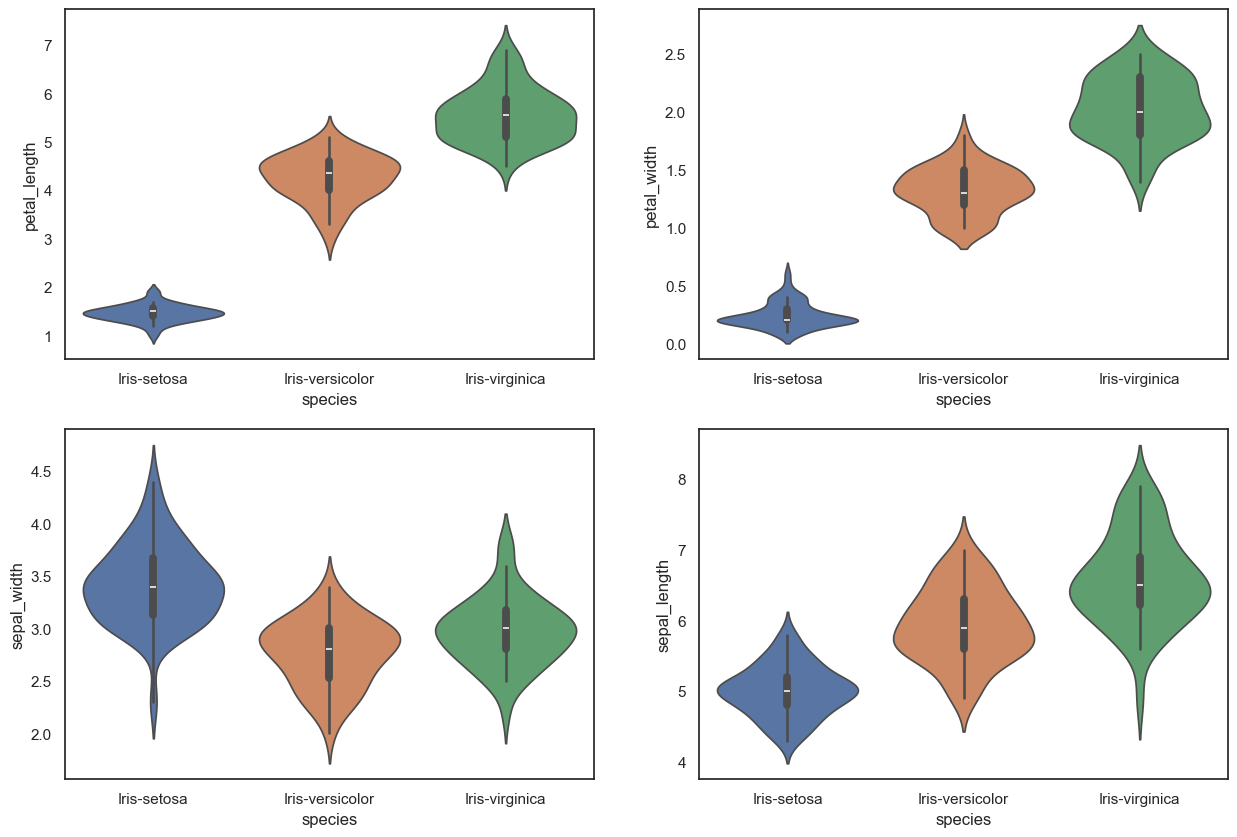

In [20]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x="species", y="petal_length", data=df, palette="deep")
plt.subplot(2,2,2)
sns.violinplot(x="species", y="petal_width", data=df, palette="deep")
plt.subplot(2,2,3)
sns.violinplot(x="species", y="sepal_width", data=df, palette="deep")
plt.subplot(2,2,4)
sns.violinplot(x="species", y="sepal_length", data=df, palette="deep")



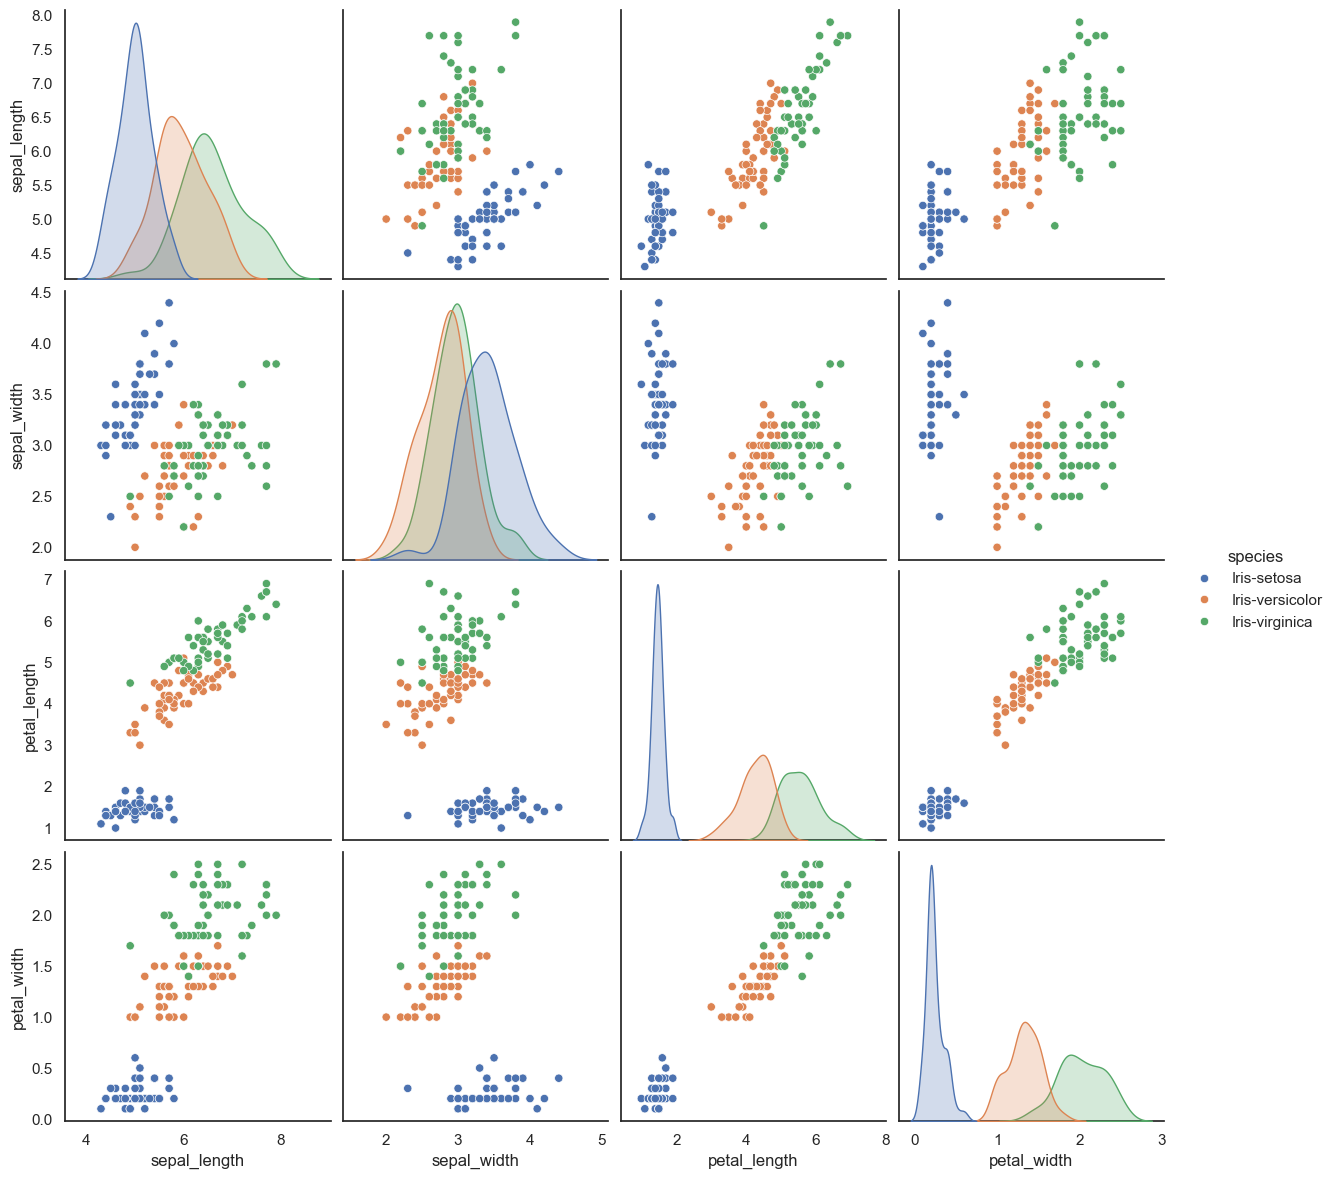

In [23]:
sns.pairplot(df, hue="species", size=3)

array([[<Axes: title={'center': 'petal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'petal_width'}, xlabel='[species]'>],
       [<Axes: title={'center': 'sepal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

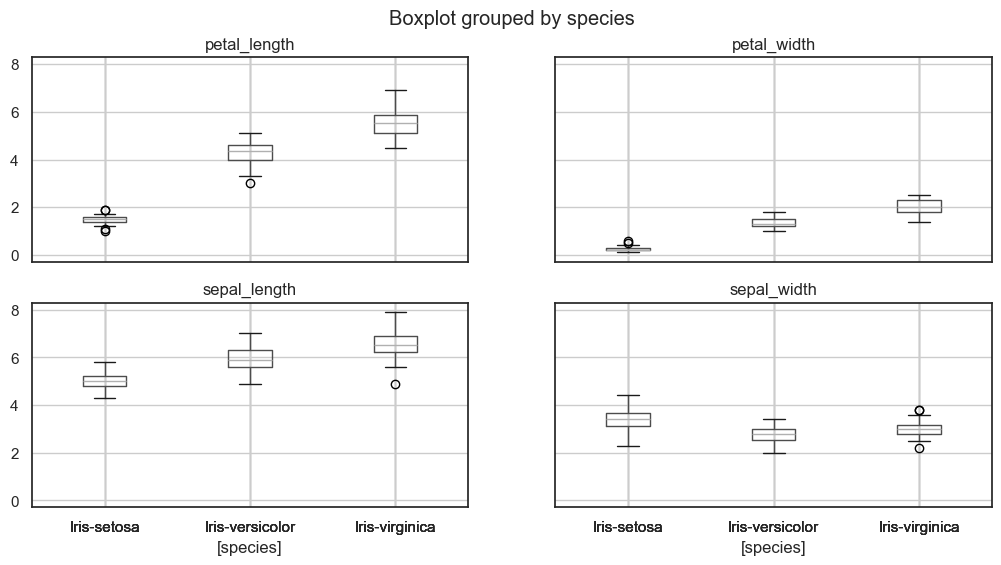

In [25]:
df.boxplot(by="species", figsize=(12, 6))

<Axes: >

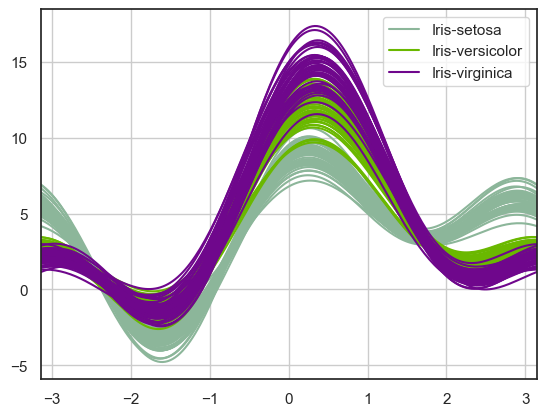

In [32]:
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these

andrews_curves(df, "species")

<Axes: >

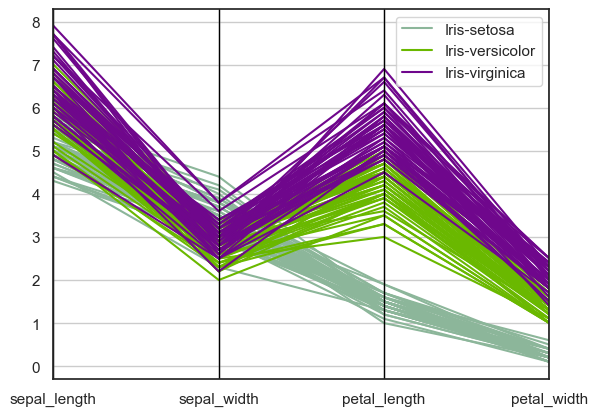

In [35]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample

parallel_coordinates(df, "species")


<Axes: >

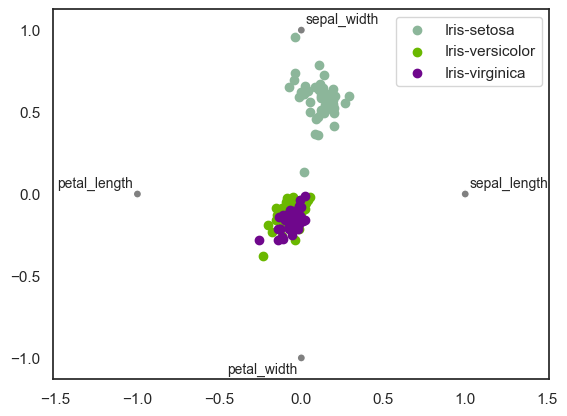

In [37]:
radviz(df, "species")

In [5]:
import pandas as pd

df = pd.read_csv('IRIS.csv')  

df.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


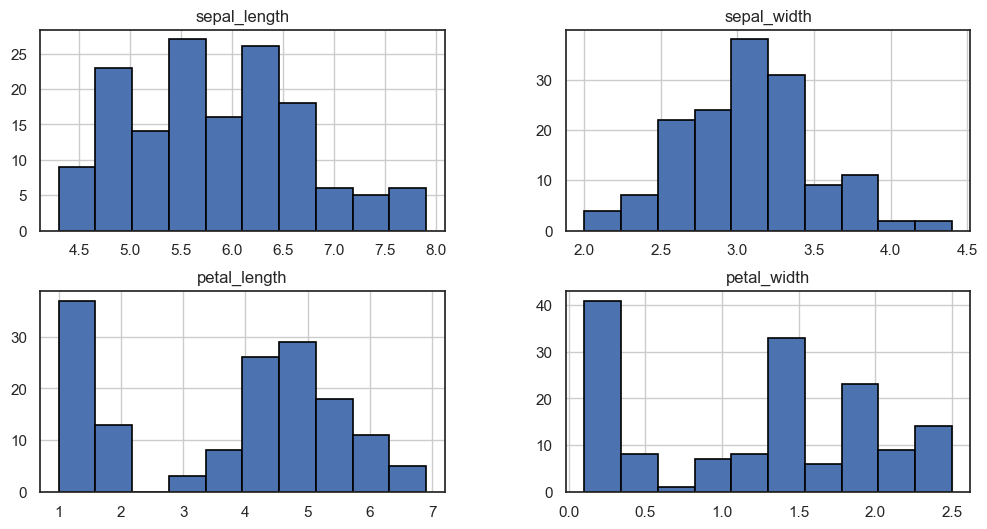

In [21]:
df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()


# MACHINE LEARNING

In [48]:
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split  #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [35]:
df.shape

(150, 5)

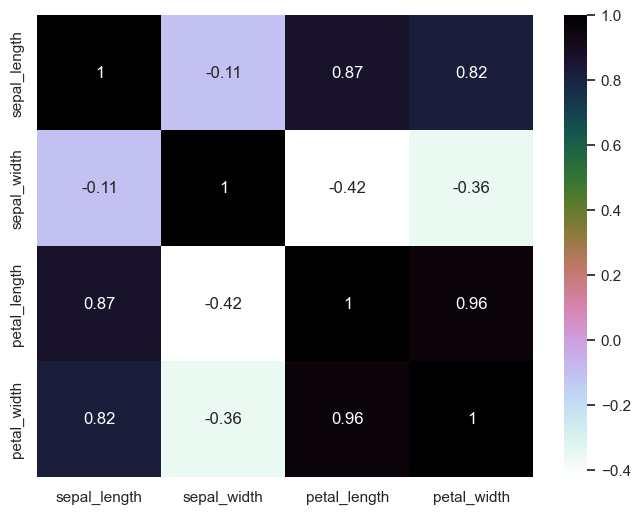

In [79]:
plt.figure(figsize=(8, 6))
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap="cubehelix_r")  # #draws  heatmap with input as the correlation matrix calculted by(numeric_df.corr()) 
plt.show()
 


- **Observation**
- The Sepal Width and Length are not correlated 
- The Petal Width and Length are highly correlated
- **Use all the features for training the algorithm and check the accuracy**
- Use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm, as we are using only 2 features that are not correlated. Thus, we can have a variance in the dataset, which may help in better accuracy. 

**Steps To Be followed When Applying an Algorithm**
- Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.
- Select any algorithm based on the problem (classification or regression) whatever you feel may be good.
- Then pass the training dataset to the algorithm to train it. We use the .fit() method
- Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method.
- We then check the accuracy by passing the predicted outcome and the actual output to the model.

**Splitting The Data into Training And Testing Datase**

In [43]:
# Splitting The Data into Training And Testing Dataset

train, test = train_test_split(df, test_size = 0.3)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [47]:
train_X = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]# taking the training data features
train_y=train.species # output of our training data
test_X= test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] # taking test data features
test_y =test.species   #output value of test data

In [49]:
# check the Train and Test Dataset

train_X.head(3)

,sepal_length,sepal_width,petal_length,petal_width
97,6.2,2.9,4.3,1.3
1,4.9,3.0,1.4,0.2
102,7.1,3.0,5.9,2.1


In [50]:
train_y.head(3)  #output of the training data

97     Iris-versicolor
1          Iris-setosa
102     Iris-virginica
Name: species, dtype: object

**Support Vector Machine (SVM)**

In [51]:
model = svm.SVC() #select the algorithm
model.fit(train_X,train_y) # we train the algorithm with the training data and the training output
prediction=model.predict(test_X) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is: 0.9555555555555556


- The accuracy of the SVM is: 0.9555555555555556
- SVM is giving very good accuracy.

**Logistic Regression**

In [52]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))



The accuracy of the Logistic Regression is 0.9777777777777777


- The accuracy of the Logistic Regression is 0.9777777777777777
- Logistic Regression is giving very good accuracy

**Decision Tree**

In [53]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.9555555555555556


**The accuracy of the Decision Tree is 0.9555555555555556, which is good**

**K-Nearest Neighbours**

In [54]:
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.9777777777777777


**Checking the accuracy for various values of n for K-Nearest Neighbours**

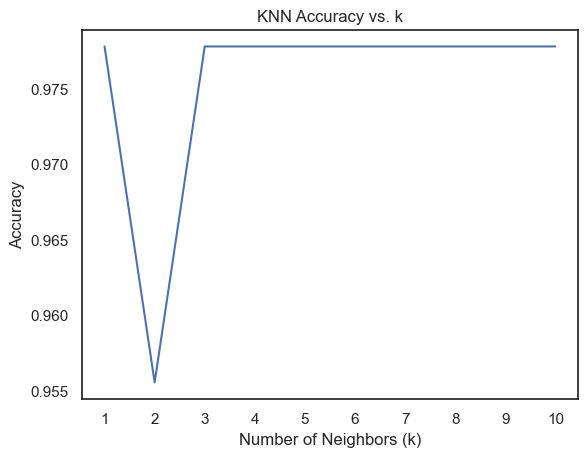

In [64]:
a_index = list(range(1, 11))
a = []

for i in a_index:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    a.append(metrics.accuracy_score(prediction, test_y))

plt.plot(a_index, a)
plt.xticks(a_index)
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs. k")
plt.show()


- **Using Petals and Sepals Seperately to train models**
- Creating Petals And Sepals Training Data

In [68]:
petal=df[['petal_length', 'petal_width','species']]
sepal=df[['sepal_length','sepal_width','species']]

In [71]:
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)  # the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
train_x_p=train_p[['petal_width', 'petal_length']]
train_y_p=train_p.species
test_x_p=test_p[['petal_width', 'petal_length']]
test_y_p=test_p.species

In [73]:
train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)  # the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
train_x_s=train_s[['sepal_width', 'sepal_length']]
train_y_s=train_s.species
test_x_s=test_s[['sepal_width', 'sepal_length']]
test_y_s=test_s.species

**Support Vector Machine (SVM) on Petal & Sepal datasets**

In [75]:
model=svm.SVC()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the SVM using Sepal is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepal is: 0.8


**Logistic Regression**

In [76]:
model = LogisticRegression()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
The accuracy of the Logistic Regression using Sepals is: 0.8222222222222222


**Decision Tree**

In [77]:
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6666666666666666


**K-Nearest Neighbours**

In [78]:
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333


- **Observations**
- Using Petals over Sepal for training the data gives a much better accuracy.
- This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high.

**K-Means Clustering**
- Select Features for sepal

In [19]:
# create a variable which will contain the data for the clustering
x = df.iloc[:,0:2]
x.head(5)

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


- For petal

In [20]:
# create a variable which will contain the data for the clustering
y = df.iloc[:,2:4]
y.head(5)

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


**Clustering (unscaled data)**

In [22]:
# create a k-means object with 2 clusters
kmeans = KMeans(2)
# fit the data
kmeans.fit(x)
kmeans.fit(y)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


**Clustering Results**
- Predict the cluster for each observation and create a scatter plot based on two corresponding features

In [23]:
identified_cluster_sepal = kmeans.fit_predict(x)
# create a copy of data, so we can see the clusters next to the original data
data_with_cluster_s = x.copy()
data_with_cluster_s['Clusters'] = identified_cluster_sepal
data_with_cluster_s

,sepal_length,sepal_width,Clusters
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,1
...,...,...,...
145,6.7,3.0,0
146,6.3,2.5,0
147,6.5,3.0,0
148,6.2,3.4,0


**Ceate a scatter plot based on two corresponding features (sepal_length and sepal_width)**

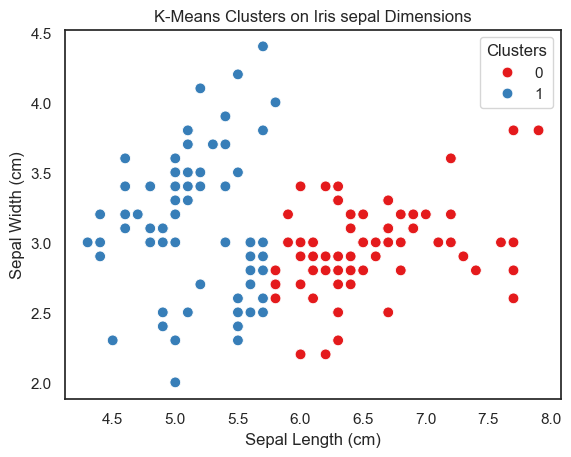

In [41]:
sns.scatterplot(
    data= data_with_cluster_s,
    x="sepal_length",
    y="sepal_width",
    hue="Clusters",
    palette="Set1",
    s=60,                # fixed point size
    edgecolor="w",       # white border around points
)

plt.title("K-Means Clusters on Iris sepal Dimensions")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(title="Clusters")
plt.show()

In [42]:
identified_cluster_petal = kmeans.fit_predict(y)
# create a copy of data, so we can see the clusters next to the original data
data_with_cluster_p = y.copy()
data_with_cluster_p['Clusters'] = identified_cluster_sepal
data_with_cluster_p

,petal_length,petal_width,Clusters
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


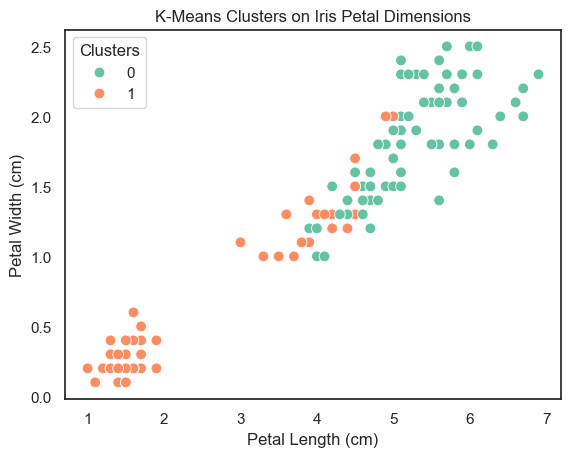

In [79]:
sns.scatterplot(
    data=data_with_cluster_p,
    x="petal_length",
    y="petal_width",
    hue="Clusters",
    palette="Set2",
    s=60,                # fixed point size
    edgecolor="w",       # white border around points
)

plt.title("K-Means Clusters on Iris Petal Dimensions")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(title="Clusters")
plt.show()

**Standardize the variables**
- Import and use the scale method from sklearn to standardise the data. **(subtracts each feature’s mean and divides by its standard deviation)**

In [49]:
sepal_scaled = preprocessing.scale(x)
petal_scaled = preprocessing.scale(y)

In [91]:
# create a k-means object with 2 clusters
kmeans_scaled = KMeans(2)
# fit the data
kmeans_scaled.fit(sepal_scaled)
kmeans_scaled.fit(petal_scaled)
# create a copy of data, so we can see the clusters next to the original data
clusters_sepal_scaled = x.copy()
clusters_petal_scaled = y.copy()
# predict the cluster for each observation
clusters_sepal_scaled['cluster_pred_s']=kmeans_scaled.fit_predict(sepal_scaled)
clusters_petal_scaled['cluster_pred_p']=kmeans_scaled.fit_predict(petal_scaled)
clusters_sepal_scaled
clusters_petal_scaled

,petal_length,petal_width,cluster_pred_p
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


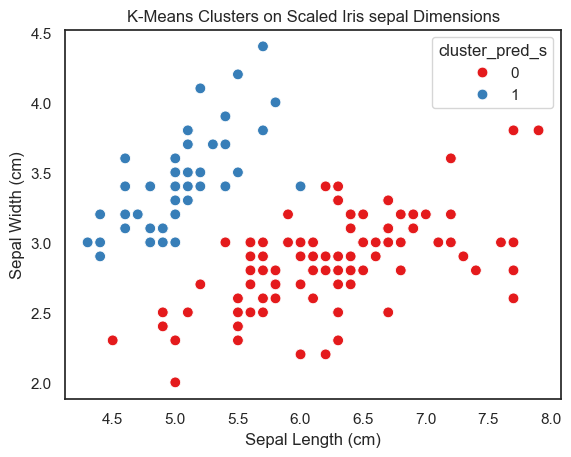

In [92]:
sns.scatterplot(
    data= clusters_sepal_scaled,
    x="sepal_length",
    y="sepal_width",
    hue="cluster_pred_s",
    palette="Set1",
    s=60,                # fixed point size
    edgecolor="w",       # white border around points
)

plt.title("K-Means Clusters on Scaled Iris sepal Dimensions")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(title="cluster_pred_s")
plt.show()

In [93]:
clusters_petal_scaled

,petal_length,petal_width,cluster_pred_p
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


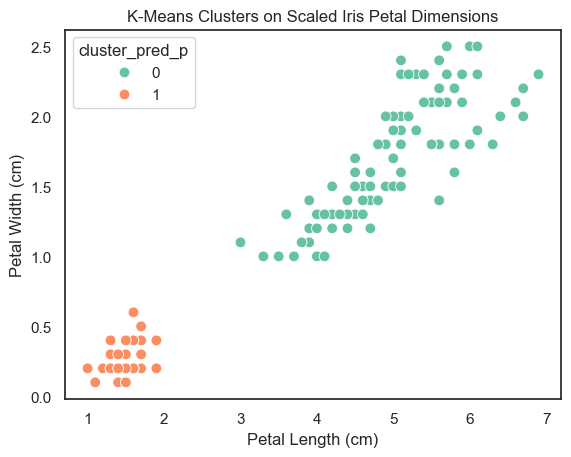

In [94]:
sns.scatterplot(
    data= clusters_petal_scaled,
    x="petal_length",
    y="petal_width",
    hue="cluster_pred_p",
    palette="Set2",
    s=60,                # fixed point size
    edgecolor="w",       # white border around points
)

plt.title("K-Means Clusters on Scaled Iris Petal Dimensions")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(title="cluster_pred_p")
plt.show()

**Take Advantage of the Elbow Method**
- Select the number of Cluster
- WCSS('within-cluster sum of squares')
- By minimising the wcss get perfect clustring solution

In [73]:
wcss = []
cl_nm = 10
# 'cl_num' keeps track the highest number of clusters we want to use the WCSS method for. 
# We have it set at 10 right now, but it is completely arbitrary.
for i in range(1,cl_nm):
    kmeans = KMeans(i)
    kmeans.fit(sepal_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

wcss

[300.00000000000006,
 168.39262198361087,
 103.81453420646659,
 80.17836072101112,
 71.67059757733428,
 52.916340376299246,
 44.39569486966203,
 38.2758762268224,
 34.858248958127305]

**The Elbow Method for sepal**

Text(0, 0.5, 'Within-cluster Sum of Squares')

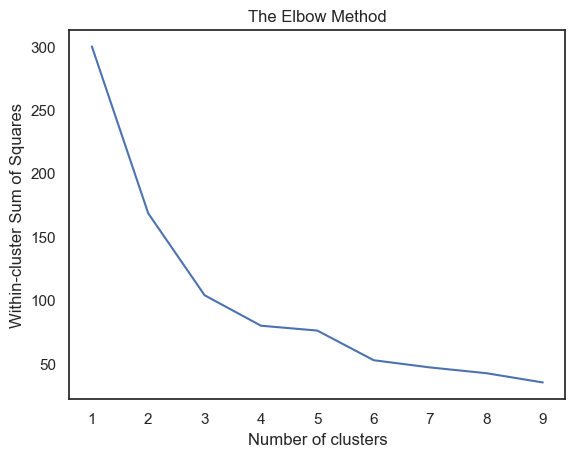

In [62]:
number_clusters = range(1,cl_nm)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

**By analysing this graph 3-4 clusters are much better**

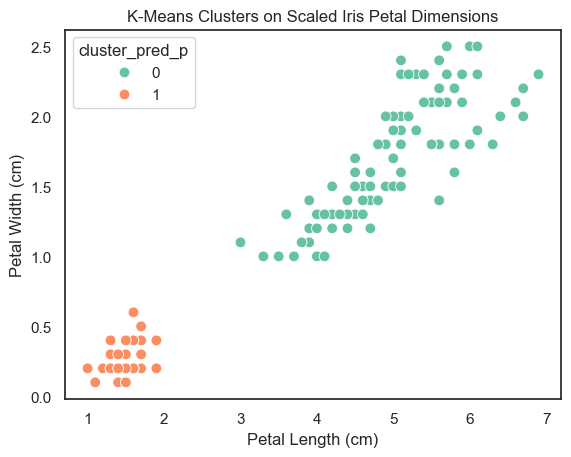

In [78]:
sns.scatterplot(
    data= clusters_petal_scaled,
    x="petal_length",
    y="petal_width",
    hue="cluster_pred_p",
    palette="Set2",
    s=60,                # fixed point size
    edgecolor="w",       # white border around points
)

plt.title("K-Means Clusters on Scaled Iris Petal Dimensions")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(title="cluster_pred_p")
plt.show()

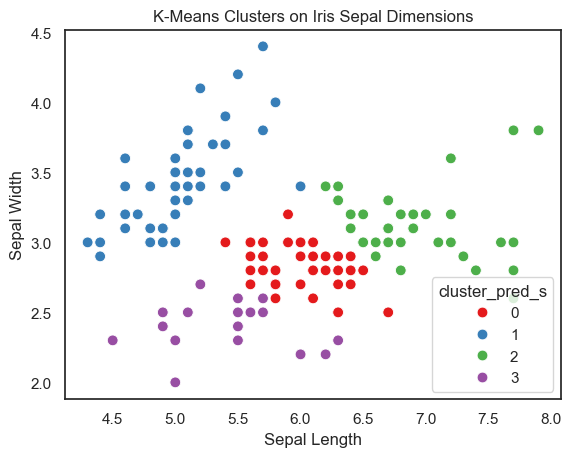

In [76]:
kmeans_scaled = KMeans(4)
kmeans_scaled.fit(sepal_scaled)
clusters_sepal_scaled = x.copy()
clusters_sepal_scaled['cluster_pred_s']=kmeans_scaled.fit_predict(sepal_scaled)
# create a scatter plot based on two corresponding features (sepal_length and sepal_width)
sns.scatterplot(data = clusters_sepal_scaled, x = "sepal_length", y = "sepal_width", hue="cluster_pred_s", palette="Set1", s=60, edgecolor="w") 
plt.title("K-Means Clusters on Iris Sepal Dimensions")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title="cluster_pred_s")
plt.show()

In [74]:
wcss_p = []
cl_nm = 10
# 'cl_num' that keeps track of the highest number of clusters we want to use the WCSS method for. 
# We have it set at 10 right now, but it is completely arbitrary.
for i in range(1,cl_nm):
    kmeans = KMeans(i)
    kmeans.fit(petal_scaled)
    wcss_iter = kmeans.inertia_
    wcss_p.append(wcss_iter)

wcss_p

[300.0,
 54.14584701344989,
 18.046983891906272,
 12.554097124795964,
 9.191580367383063,
 8.007483308434532,
 8.664154630433966,
 6.340857736743924,
 4.844438271087912]

**The Elbow Method for petal**

Text(0, 0.5, 'Within-cluster Sum of Squares')

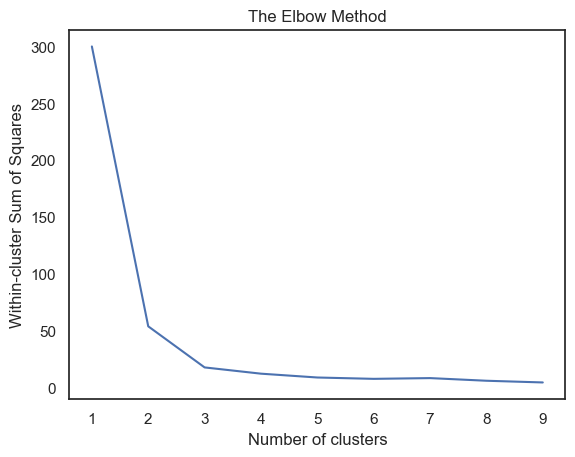

In [75]:
number_clusters = range(1,cl_nm)
plt.plot(number_clusters, wcss_p)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

**3-cluster solutions are the best**

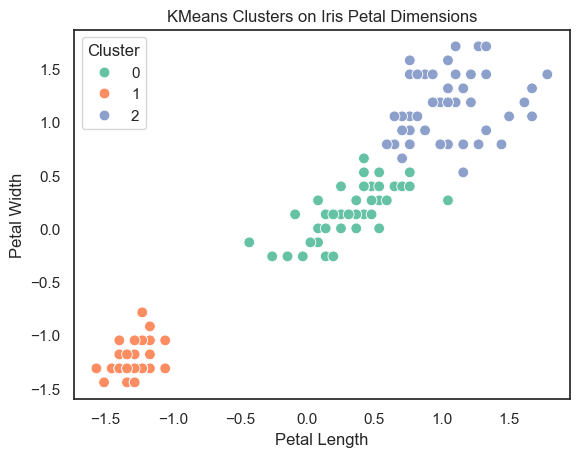

In [100]:
# 1. Fit KMeans and get labels
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(petal_scaled)

# 2. Construct DataFrame
df_petal = pd.DataFrame(
    petal_scaled,
    columns=["petal_length", "petal_width"]
)
df_petal["cluster_pred"] = labels

# 3. Pass the DataFrame to scatterplot
sns.scatterplot(
    data=df_petal,
    x="petal_length",
    y="petal_width",
    hue="cluster_pred",
    palette="Set2",
    s=60,
    edgecolor="w"
)

plt.title("KMeans Clusters on Iris Petal Dimensions")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend(title="Cluster")
plt.show()